مشروع تحليل بيانات متجر الكتروني 

In [16]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [17]:
df1 = pd.read_csv("Sales/Sales_January_2019.csv")
df1["month"]="Jan"
df2 = pd.read_csv("Sales/Sales_February_2019.csv")
df2["month"]="feb"
df3 = pd.read_csv("Sales/Sales_March_2019.csv")
df3["month"]="mar"
df4 = pd.read_csv("Sales/Sales_April_2019.csv")
df4["month"]="apr"
df5 = pd.read_csv("Sales/Sales_May_2019.csv")
df5["month"]="may"
df6 = pd.read_csv("Sales/Sales_June_2019.csv")
df6["month"]="june"
df7 = pd.read_csv("Sales/Sales_July_2019.csv")
df7["month"]="july"
df8 = pd.read_csv("Sales/Sales_August_2019.csv")
df8["month"]="aug"
df9 = pd.read_csv("Sales/Sales_September_2019.csv")
df9["month"]="sep"
df10 = pd.read_csv("Sales/Sales_October_2019.csv")
df10["month"]="oct"
df11 = pd.read_csv("Sales/Sales_November_2019.csv")
df11["month"]="nov"
df12 = pd.read_csv("Sales/Sales_December_2019.csv")
df12["month"]="dec"

In [18]:
list=[df1 ,df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]

In [19]:
for i in list: # الدوران 
    print(i.shape)

(9723, 7)
(12036, 7)
(15226, 7)
(18383, 7)
(16635, 7)
(13622, 7)
(14371, 7)
(12011, 7)
(11686, 7)
(20379, 7)
(17661, 7)
(25117, 7)


In [20]:
frame = pd.concat(list,  ignore_index=True)
frame

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",Jan
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",Jan
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",Jan
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",Jan
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",Jan
...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",dec
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",dec
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",dec
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",dec


In [21]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
 6   month             186850 non-null  object
dtypes: object(7)
memory usage: 10.0+ MB


In [22]:
frame.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
month                 0
dtype: int64

In [23]:
frame.duplicated().sum()

1140

In [24]:
frame.nunique()

Order ID            178438
Product                 20
Quantity Ordered        10
Price Each              24
Order Date          142396
Purchase Address    140788
month                   12
dtype: int64

In [25]:
frame['Product'].unique()

array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
       '27in FHD Monitor', 'AAA Batteries (4-pack)',
       '27in 4K Gaming Monitor', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'Apple Airpods Headphones',
       'Macbook Pro Laptop', 'Flatscreen TV', 'Vareebadd Phone',
       'AA Batteries (4-pack)', 'Google Phone', '20in Monitor',
       '34in Ultrawide Monitor', 'ThinkPad Laptop', 'LG Dryer',
       'LG Washing Machine', nan, 'Product'], dtype=object)

تنظيف وحذف البيانات 

In [26]:
frame.columns = [col.lower() for col in frame]
frame.columns

Index(['order id', 'product', 'quantity ordered', 'price each', 'order date',
       'purchase address', 'month'],
      dtype='object')

In [27]:
frame.rename(columns={
        'order id': 'order_id', 
        'quantity ordered': 'quantity_ordered',
        'price each': 'price_each',
        'order date': 'order_date',
        'purchase address': 'purchase_address',
    }, inplace=True
)
frame

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",Jan
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",Jan
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",Jan
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",Jan
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",Jan
...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",dec
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",dec
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",dec
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",dec


In [28]:
(frame.isnull().sum().sum()) / len(frame) * 100

1.75006689858175

In [29]:
frame = frame.dropna()
frame.isnull().sum()

order_id            0
product             0
quantity_ordered    0
price_each          0
order_date          0
purchase_address    0
month               0
dtype: int64

In [30]:
frame['quantity_ordered'].unique()

array(['1', '2', '3', '5', '4', '7', 'Quantity Ordered', '6', '9', '8'],
      dtype=object)

In [31]:
frame['price_each'].unique()

array(['700', '14.95', '11.99', '149.99', '2.99', '389.99', '11.95',
       '99.99', '150', '1700', '300', '400', '3.84', '600', '109.99',
       '379.99', '999.99', '600.0', 'Price Each', '700.0', '150.0',
       '300.0', '1700.0', '400.0'], dtype=object)

In [32]:
df = frame[frame['quantity_ordered'] != "Quantity Ordered"]
df = frame[frame['price_each'] != "Price Each"]

In [33]:
df['quantity_ordered'].unique()

array(['1', '2', '3', '5', '4', '7', '6', '9', '8'], dtype=object)

In [34]:
df['price_each'].unique()

array(['700', '14.95', '11.99', '149.99', '2.99', '389.99', '11.95',
       '99.99', '150', '1700', '300', '400', '3.84', '600', '109.99',
       '379.99', '999.99', '600.0', '700.0', '150.0', '300.0', '1700.0',
       '400.0'], dtype=object)

In [35]:
df = df.astype({"quantity_ordered": int, "price_each": float})
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",Jan
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",Jan
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",Jan
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",Jan
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",Jan


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          185950 non-null  object 
 1   product           185950 non-null  object 
 2   quantity_ordered  185950 non-null  int32  
 3   price_each        185950 non-null  float64
 4   order_date        185950 non-null  object 
 5   purchase_address  185950 non-null  object 
 6   month             185950 non-null  object 
dtypes: float64(1), int32(1), object(5)
memory usage: 10.6+ MB


In [37]:
df["sales"] = df["quantity_ordered"] * df["price_each"]
df

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",Jan,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",Jan,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",Jan,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",Jan,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",Jan,11.99
...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",dec,14.95
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",dec,7.68
186847,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",dec,400.00
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",dec,11.99


In [38]:
month_sales = df.groupby('month')['sales'].agg(sales_sum = 'sum').sort_values(by="sales_sum", ascending=False).reset_index()
month_sales # مبيعات الشهريه 

,month,sales_sum
0,dec,4619297.12
1,oct,3736884.05
2,apr,3396059.11
3,nov,3198909.23
4,may,3144584.80
5,mar,2809063.30
6,july,2646899.69
7,june,2578293.30
8,aug,2244412.31
9,feb,2203481.24


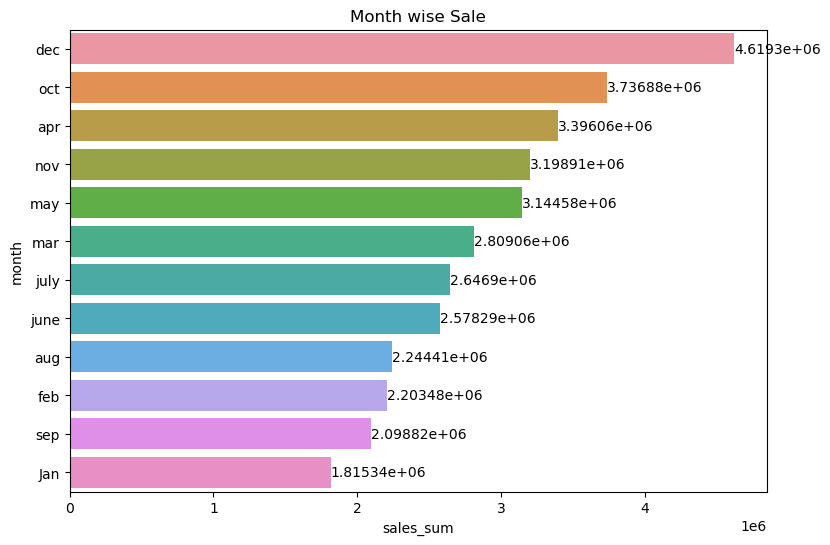

In [39]:
# رسم مخطط المبيعات الشهريه 
fig, ax = plt.subplots(figsize=(9,6))
ax=sns.barplot(x='sales_sum',y='month',data=month_sales)
plt.title("Month wise Sale")
ax.bar_label(ax.containers[0])
plt.show()

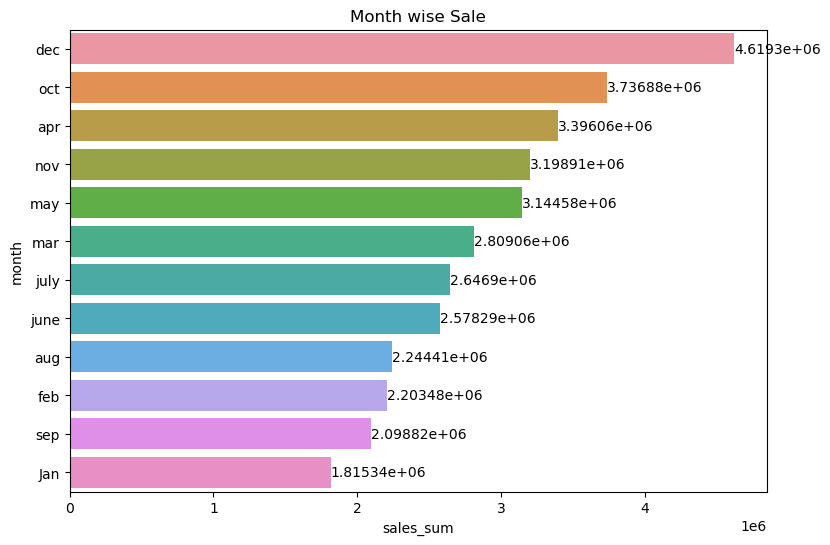

In [40]:
fig, ax = plt.subplots(figsize=(9, 6))
ax = sns.barplot(x = "sales_sum",
            y = "month",
            data = month_sales)

plt.title("Month wise Sale")
ax.bar_label(ax.containers[0])
plt.show()

In [41]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

df['city'] = df['purchase_address'].apply(lambda x: get_city(x) + ' (' + get_state(x) + ')')
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",Jan,700.00,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",Jan,14.95,Portland (OR)
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",Jan,23.98,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",Jan,149.99,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",Jan,11.99,Austin (TX)


In [42]:
city_sales = df.groupby('city')['sales'].agg(city_sales = 'sum').sort_values(by="city_sales", ascending=True).reset_index()
city_sales

,city,city_sales
0,Portland (ME),449758.27
1,Austin (TX),1819581.75
2,Portland (OR),1870732.34
3,Seattle (WA),2747755.48
4,Dallas (TX),2767975.40
5,Atlanta (GA),2795498.58
6,Boston (MA),3661642.01
7,New York City (NY),4664317.43
8,Los Angeles (CA),5452570.80
9,San Francisco (CA),8262203.91


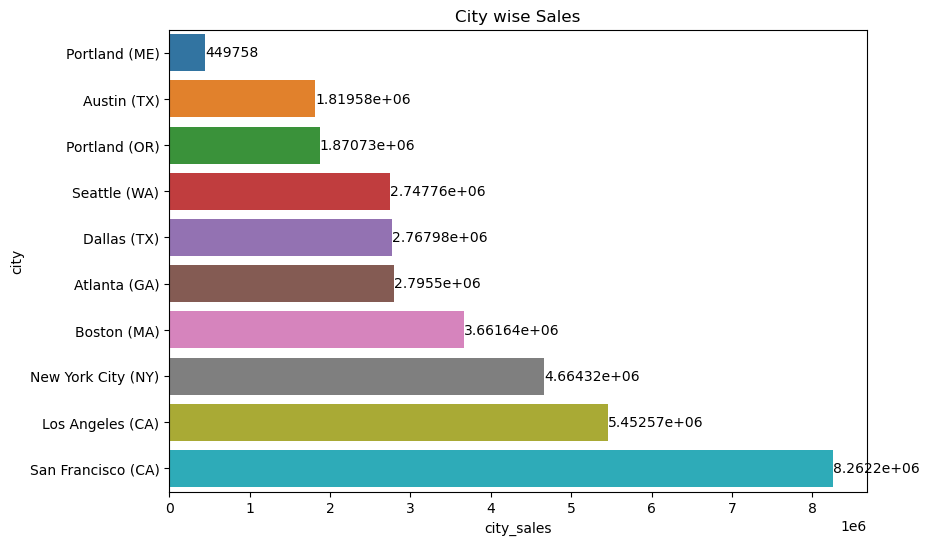

In [43]:
# مبيعات كل مدينه 
fig, ax = plt.subplots(figsize=(9, 6))
sns.barplot(x = "city_sales",
            y = "city",
            data = city_sales)

plt.title("City wise Sales")
ax.bar_label(ax.containers[0])
plt.show()

In [44]:
df.nunique()

order_id            178437
product                 19
quantity_ordered         9
price_each              17
order_date          142395
purchase_address    140787
month                   12
sales                   54
city                    10
dtype: int64

In [45]:
df["product"].unique()

array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
       '27in FHD Monitor', 'AAA Batteries (4-pack)',
       '27in 4K Gaming Monitor', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'Apple Airpods Headphones',
       'Macbook Pro Laptop', 'Flatscreen TV', 'Vareebadd Phone',
       'AA Batteries (4-pack)', 'Google Phone', '20in Monitor',
       '34in Ultrawide Monitor', 'ThinkPad Laptop', 'LG Dryer',
       'LG Washing Machine'], dtype=object)

In [46]:
product_sales = df.groupby('product')['quantity_ordered'].agg(quantity_ordered = 'sum').sort_values(by="quantity_ordered", ascending=False).reset_index()
product_sales

,product,quantity_ordered
0,AAA Batteries (4-pack),31017
1,AA Batteries (4-pack),27635
2,USB-C Charging Cable,23975
3,Lightning Charging Cable,23217
4,Wired Headphones,20557
5,Apple Airpods Headphones,15661
6,Bose SoundSport Headphones,13457
7,27in FHD Monitor,7550
8,iPhone,6849
9,27in 4K Gaming Monitor,6244


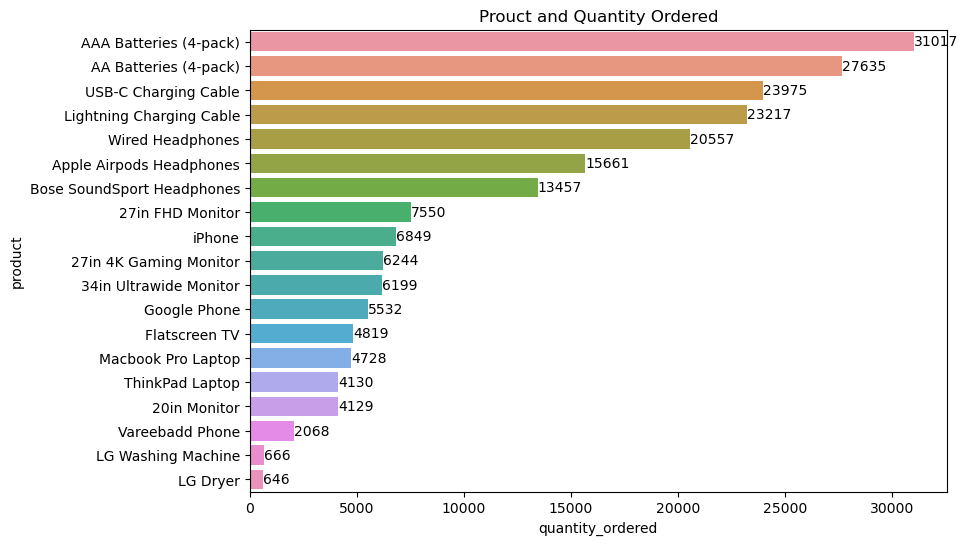

In [47]:
fig, ax = plt.subplots(figsize=(9, 6))
ax = sns.barplot(x = "quantity_ordered",
            y = "product",
            data = product_sales)

plt.title("Prouct and Quantity Ordered")

ax.bar_label(ax.containers[0])
plt.show()

In [48]:
time_sales = df
list_time = []
for i in time_sales['order_date']:
    list_time.append(i.split(" ")[1])
    
time_sales['time'] = list_time
time_sales.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city,time
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",Jan,700.00,Boston (MA),21:25
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",Jan,14.95,Portland (OR),14:15
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",Jan,23.98,San Francisco (CA),13:33
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",Jan,149.99,Los Angeles (CA),20:33
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",Jan,11.99,Austin (TX),11:59


In [49]:
time_sales = df.groupby('time')['sales'].agg(time_sales = 'sum').sort_values(by="time_sales", ascending=False).reset_index()
time_sales.head()

,time,time_sales
0,19:01,54503.14
1,12:21,54181.96
2,19:16,54156.39
3,20:13,53149.51
4,19:20,52903.41


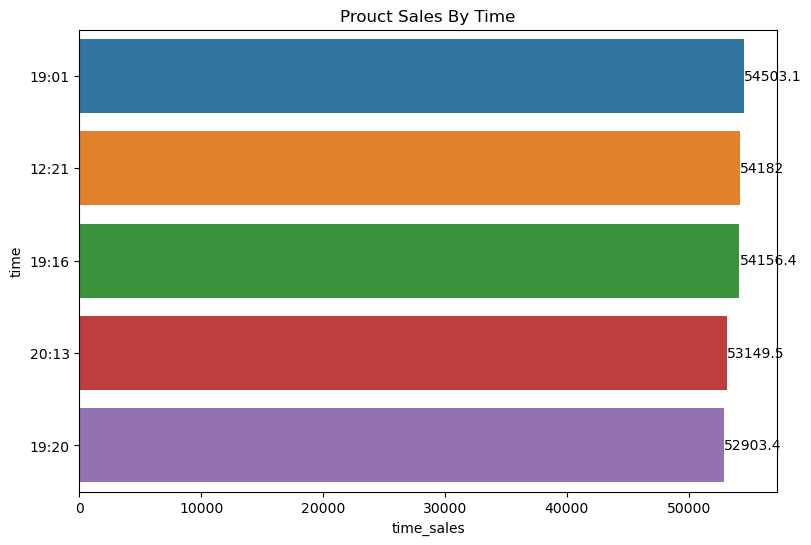

In [50]:
fig, ax = plt.subplots(figsize=(9, 6))

ax = sns.barplot(x = "time_sales",
            y = "time",
            data = time_sales.head())

plt.title("Prouct Sales By Time")

ax.bar_label(ax.containers[0])
plt.show()